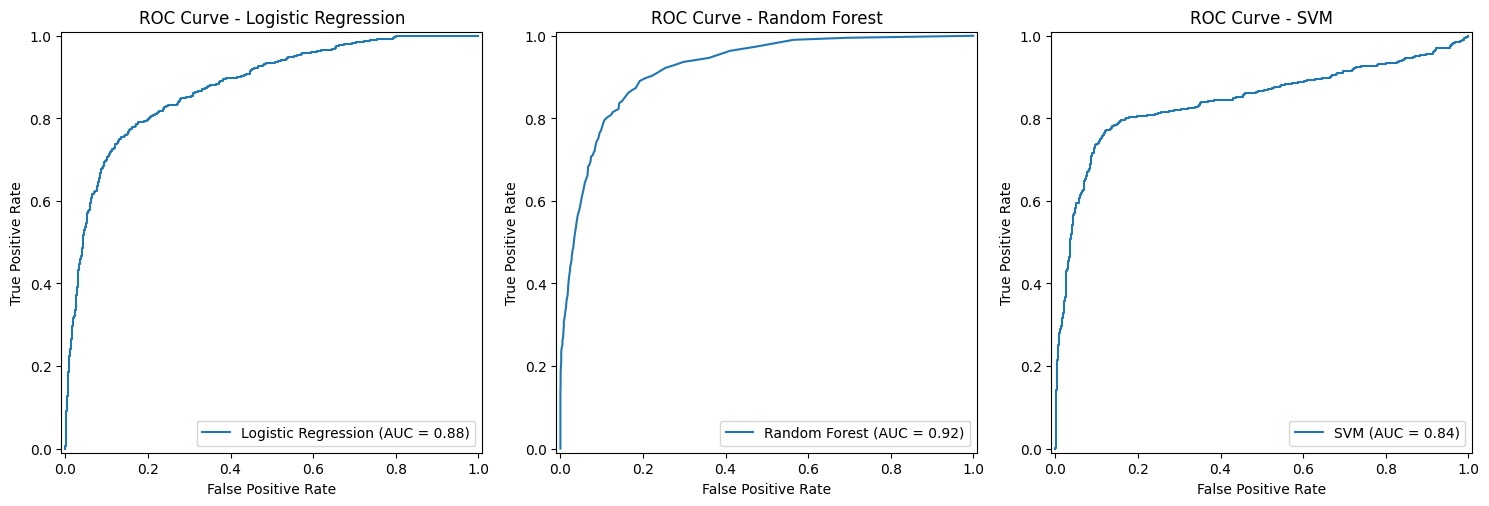


Model: Logistic Regression
Confusion Matrix:
[[2002   53]
 [ 270  141]]
F1 Score: 0.4661
Accuracy: 0.8690
ROC AUC: 0.8779

Model: Random Forest
Confusion Matrix:
[[1978   77]
 [ 191  220]]
F1 Score: 0.6215
Accuracy: 0.8913
ROC AUC: 0.9211

Model: SVM
Confusion Matrix:
[[1991   64]
 [ 231  180]]
F1 Score: 0.5496
Accuracy: 0.8804
ROC AUC: 0.8426


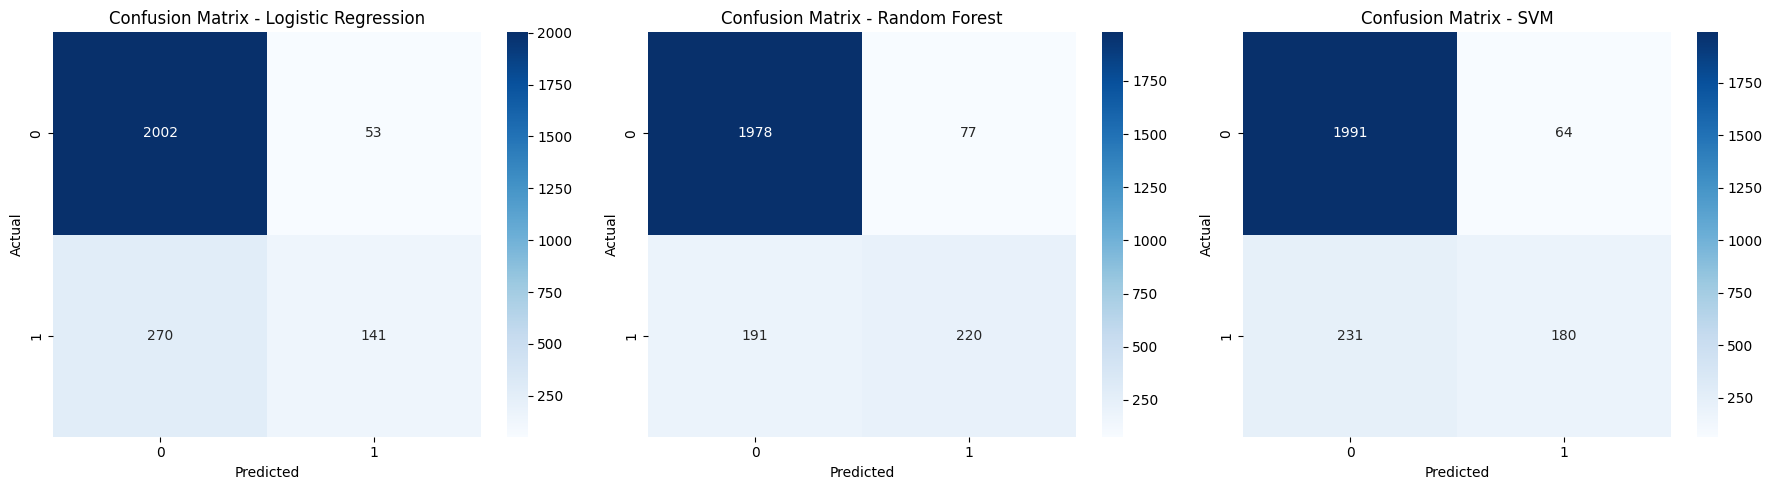

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    accuracy_score,
    roc_curve,
    auc,
    RocCurveDisplay
)


df = pd.read_csv("/content/online+shoppers+purchasing+intention+dataset.zip")


df_encoded = df.copy()
label_encoders = {}

for column in ['Month', 'VisitorType', 'Weekend']:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le


X = df_encoded.drop(columns='Revenue')
y = df_encoded['Revenue'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}


results = {}

plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]


    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    results[name] = {
        'Confusion Matrix': cm,
        'F1 Score': f1,
        'Accuracy': acc,
        'ROC AUC': roc_auc
    }


    plt.subplot(1, 3, i)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot(ax=plt.gca())
    plt.title(f"ROC Curve - {name}")

plt.tight_layout()
plt.show()


for model, metrics in results.items():
    print(f"\nModel: {model}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, metrics) in zip(axes, results.items()):
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

Dataset shape: (12330, 18)

First 5 rows:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00  

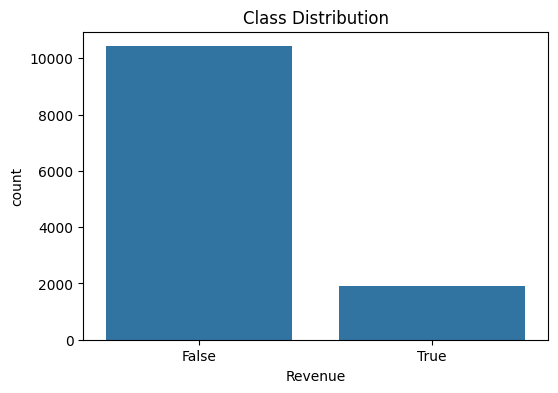

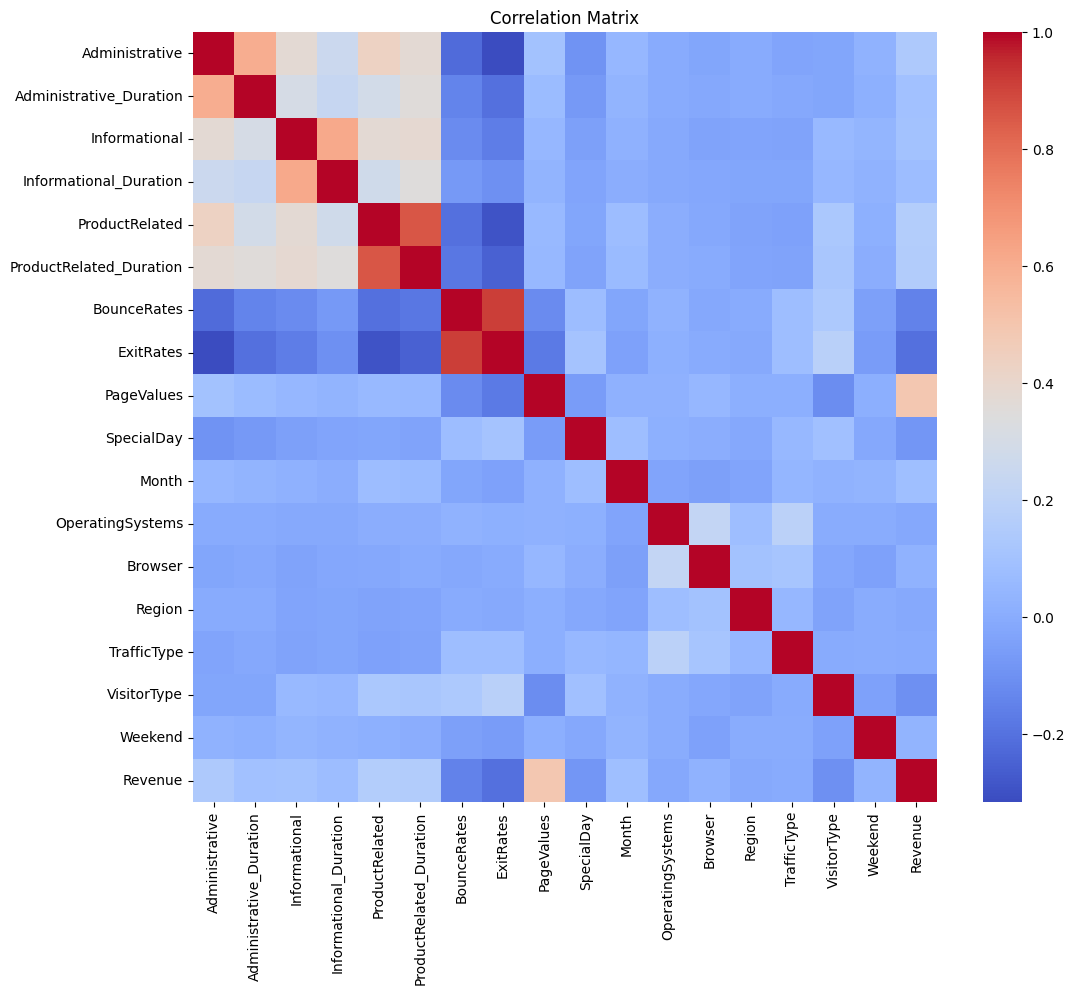

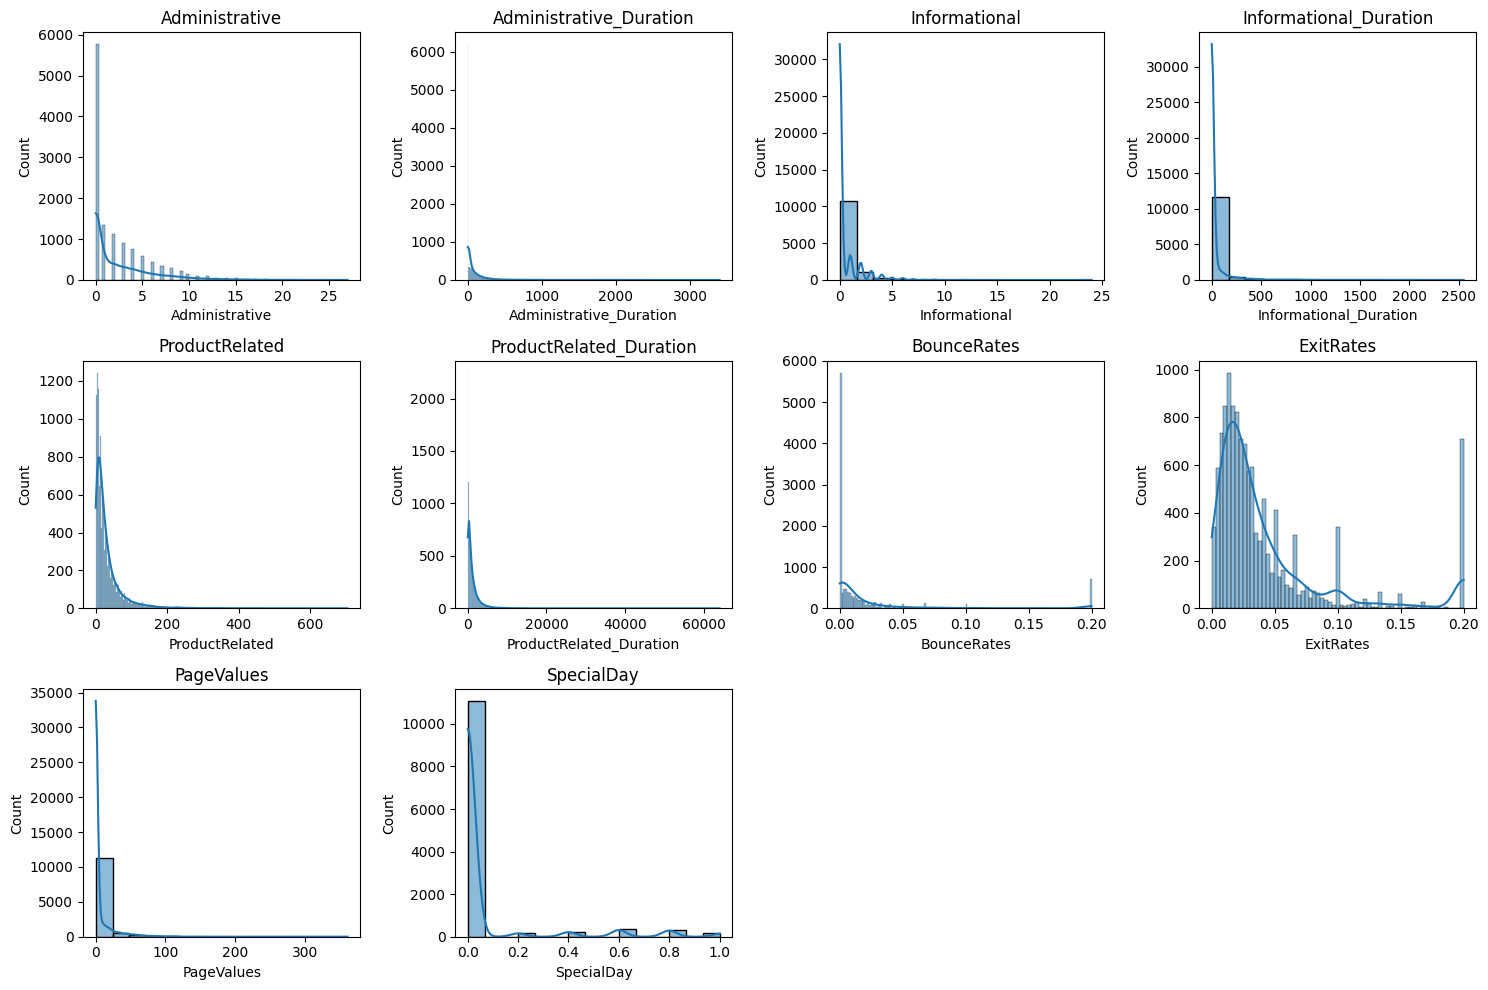


Class distribution after SMOTE:
Revenue
False    7298
True     7298
Name: count, dtype: int64


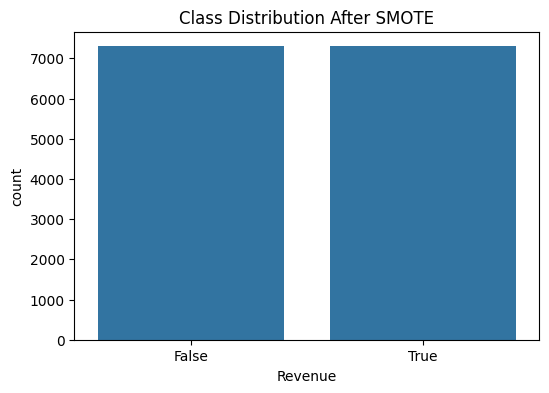


Evaluating Logistic Regression
Accuracy: 0.8705055420383887

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      3124
        True       0.56      0.74      0.64       575

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699

ROC AUC Score: 0.885763513889662


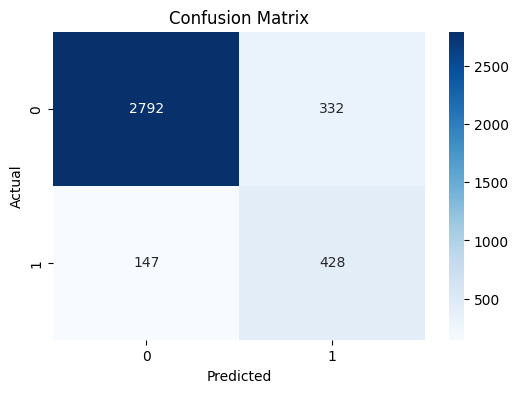


Evaluating SVM
Accuracy: 0.8696945120302785

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      3124
        True       0.56      0.72      0.63       575

    accuracy                           0.87      3699
   macro avg       0.75      0.81      0.78      3699
weighted avg       0.89      0.87      0.88      3699

ROC AUC Score: 0.8784270444803206


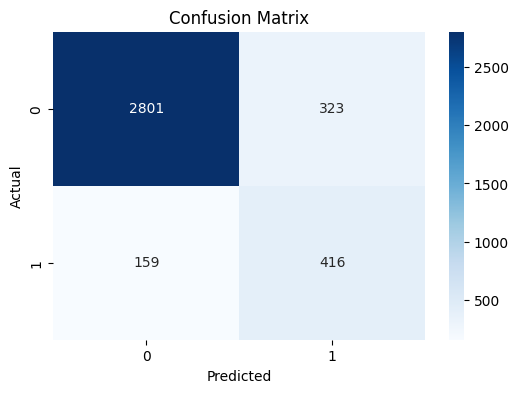


Evaluating Random Forest
Accuracy: 0.891051635577183

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.92      0.93      3124
        True       0.63      0.73      0.68       575

    accuracy                           0.89      3699
   macro avg       0.79      0.82      0.80      3699
weighted avg       0.90      0.89      0.89      3699

ROC AUC Score: 0.9245551967934087


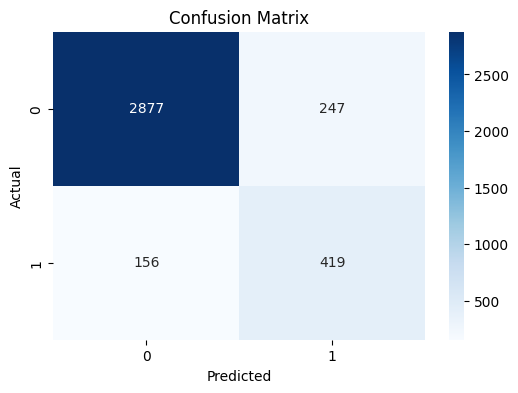


Evaluating KNN
Accuracy: 0.7834549878345499

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.80      0.86      3124
        True       0.39      0.68      0.50       575

    accuracy                           0.78      3699
   macro avg       0.66      0.74      0.68      3699
weighted avg       0.85      0.78      0.81      3699

ROC AUC Score: 0.8144858876579637


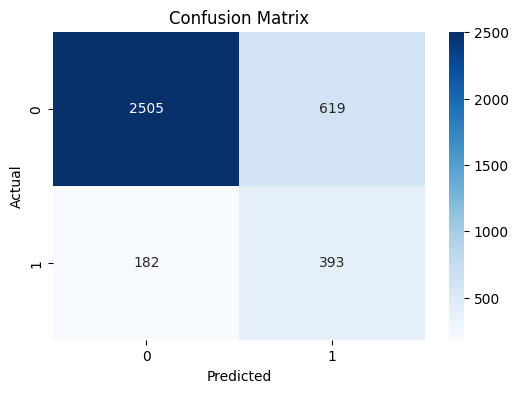


Evaluating XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:26:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8929440389294404

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.94      0.94      3124
        True       0.66      0.64      0.65       575

    accuracy                           0.89      3699
   macro avg       0.80      0.79      0.79      3699
weighted avg       0.89      0.89      0.89      3699

ROC AUC Score: 0.9174547681344987


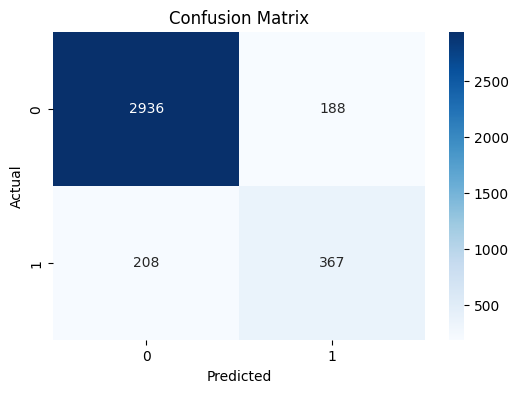


Evaluating Bagging
Accuracy: 0.8864557988645579

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.93      3124
        True       0.63      0.66      0.65       575

    accuracy                           0.89      3699
   macro avg       0.78      0.80      0.79      3699
weighted avg       0.89      0.89      0.89      3699

ROC AUC Score: 0.900032566943161


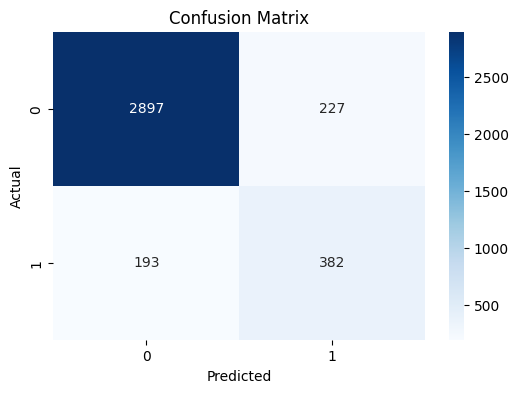


Selected Features:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'VisitorType'],
      dtype='object')

Evaluating Logistic Regression with Feature Selection
Accuracy: 0.8729386320627196

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      3124
        True       0.57      0.74      0.64       575

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699

ROC AUC Score: 0.8914145744029394


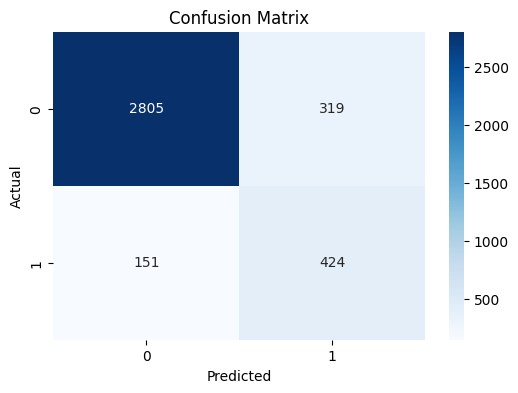


Evaluating SVM with Feature Selection
Accuracy: 0.870235198702352

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      3124
        True       0.56      0.75      0.64       575

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699

ROC AUC Score: 0.886956243389189


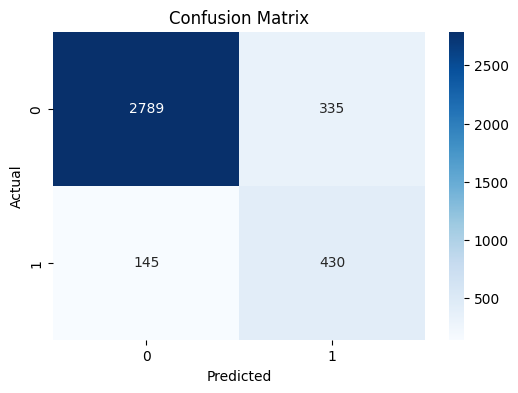


Evaluating Random Forest with Feature Selection
Accuracy: 0.8807785888077859

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.90      0.93      3124
        True       0.59      0.75      0.66       575

    accuracy                           0.88      3699
   macro avg       0.77      0.83      0.79      3699
weighted avg       0.90      0.88      0.89      3699

ROC AUC Score: 0.9028672827478705


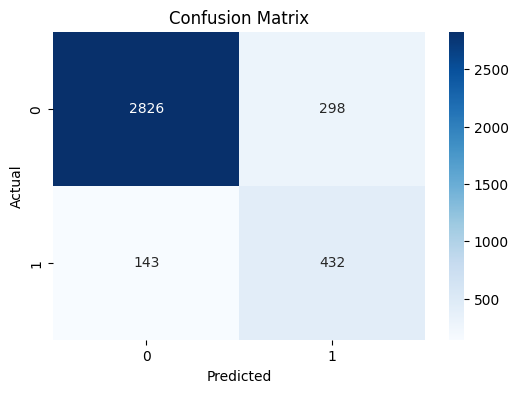


Evaluating KNN with Feature Selection
Accuracy: 0.8010273046769397

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.82      0.87      3124
        True       0.42      0.72      0.53       575

    accuracy                           0.80      3699
   macro avg       0.68      0.77      0.70      3699
weighted avg       0.86      0.80      0.82      3699

ROC AUC Score: 0.8152187830540555


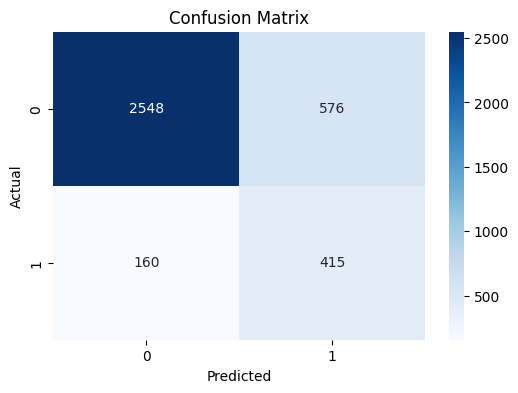


Evaluating XGBoost with Feature Selection


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:27:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8780751554474182

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.92      0.93      3124
        True       0.60      0.67      0.63       575

    accuracy                           0.88      3699
   macro avg       0.77      0.80      0.78      3699
weighted avg       0.89      0.88      0.88      3699

ROC AUC Score: 0.8932831375605411


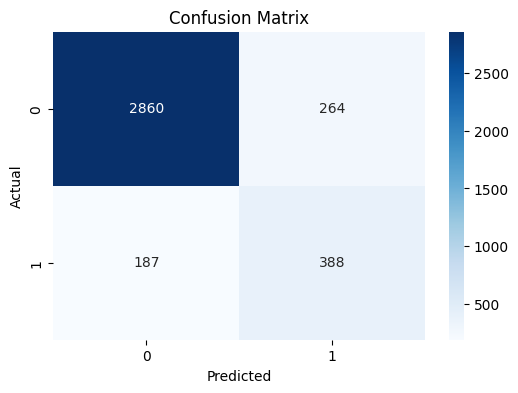


Evaluating Bagging with Feature Selection
Accuracy: 0.8764530954311976

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.91      0.93      3124
        True       0.59      0.67      0.63       575

    accuracy                           0.88      3699
   macro avg       0.76      0.79      0.78      3699
weighted avg       0.88      0.88      0.88      3699

ROC AUC Score: 0.8822281912820799


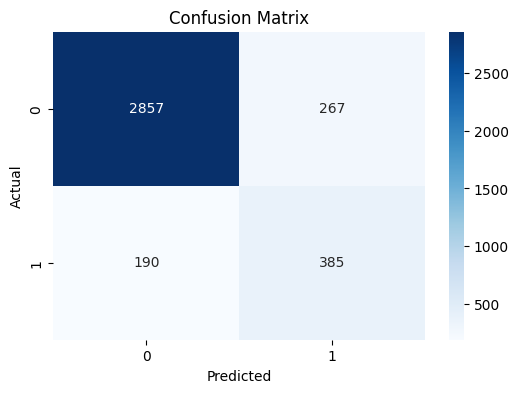


Number of components after PCA: 14

Evaluating Logistic Regression with PCA
Accuracy: 0.8737496620708299

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      3124
        True       0.57      0.74      0.65       575

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699

ROC AUC Score: 0.8878823136447143


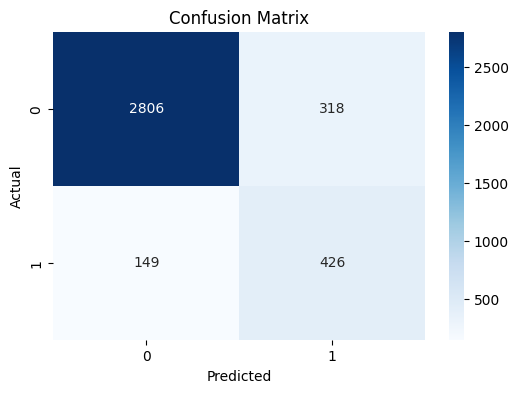


Evaluating SVM with PCA
Accuracy: 0.8664503919978372

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      3124
        True       0.55      0.74      0.63       575

    accuracy                           0.87      3699
   macro avg       0.75      0.81      0.78      3699
weighted avg       0.89      0.87      0.87      3699

ROC AUC Score: 0.8822190057340086


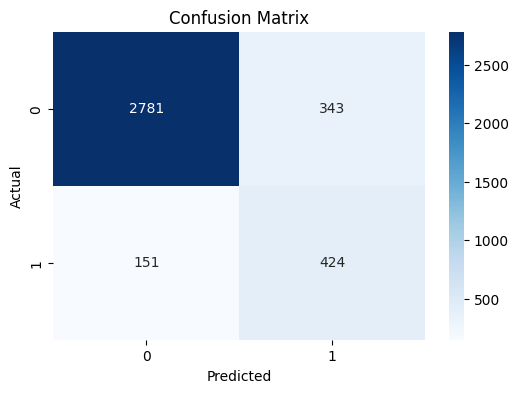


Evaluating Random Forest with PCA
Accuracy: 0.878345498783455

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.93      0.93      3124
        True       0.61      0.59      0.60       575

    accuracy                           0.88      3699
   macro avg       0.77      0.76      0.76      3699
weighted avg       0.88      0.88      0.88      3699

ROC AUC Score: 0.8740672493458775


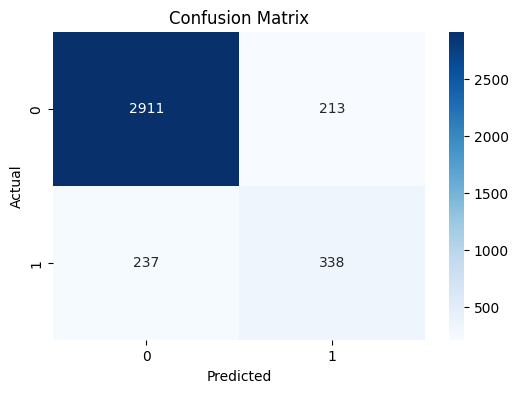


Evaluating KNN with PCA
Accuracy: 0.7850770478507705

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.80      0.86      3124
        True       0.39      0.69      0.50       575

    accuracy                           0.79      3699
   macro avg       0.66      0.74      0.68      3699
weighted avg       0.85      0.79      0.81      3699

ROC AUC Score: 0.8108854311640594


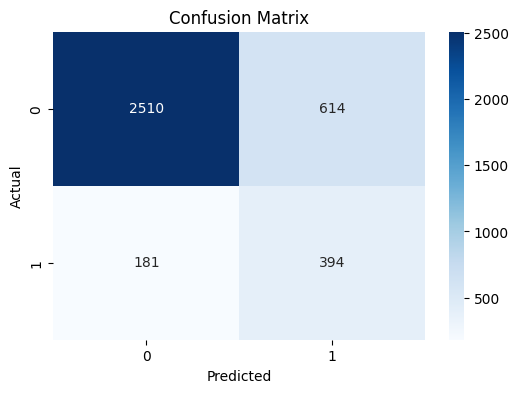


Evaluating XGBoost with PCA


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:27:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8613138686131386

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.90      0.92      3124
        True       0.55      0.63      0.59       575

    accuracy                           0.86      3699
   macro avg       0.74      0.77      0.75      3699
weighted avg       0.87      0.86      0.87      3699

ROC AUC Score: 0.8550108556477203


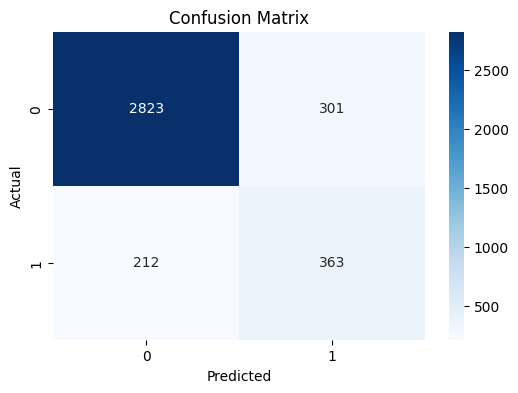


Evaluating Bagging with PCA
Accuracy: 0.8599621519329549

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.91      0.92      3124
        True       0.55      0.57      0.56       575

    accuracy                           0.86      3699
   macro avg       0.73      0.74      0.74      3699
weighted avg       0.86      0.86      0.86      3699

ROC AUC Score: 0.8446242275789122


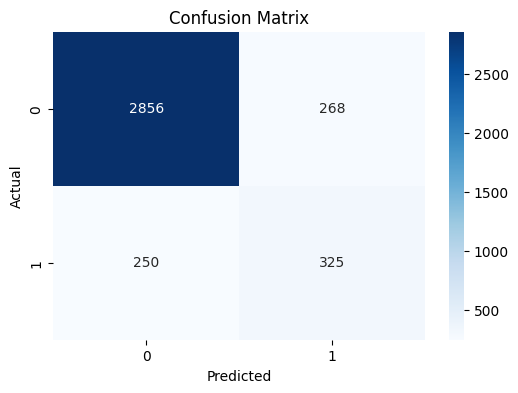

In [ ]:
!pip install lime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import lime
import lime.lime_tabular

# Load the dataset
df = pd.read_csv('/content/online_shoppers_intention.csv')

# Display dataset structure and first few rows
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

# Data Preprocessing
# Handle missing values if any (dataset appears complete)
print("\nMissing values per column:")
print(df.isnull().sum())

# Convert categorical variables
cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
for col in cat_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# EDA
# Class distribution
print("\nClass distribution:")
print(y.value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature distributions
num_cols = ['Administrative', 'Administrative_Duration', 'Informational',
            'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data before SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_smote)
plt.title('Class Distribution After SMOTE')
plt.show()

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) # y_pred is defined here
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    if y_prob is not None:
        print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return model, y_pred # Return y_pred along with the model


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Bagging": BaggingClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating {name}")
    print(f"{'='*50}")
    trained_model, y_pred = evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test) # Get y_pred here
    results[name] = {
        'model': trained_model,
        'accuracy': accuracy_score(y_test, y_pred) # Now y_pred is accessible
    }

# Feature Selection
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

# Get selected features
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:")
print(selected_features)

# Split data with selected features
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Apply SMOTE to feature-selected data
X_train_fs_smote, y_train_fs_smote = smote.fit_resample(X_train_fs, y_train_fs)

# Train and evaluate models with feature selection
results_fs = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating {name} with Feature Selection")
    print(f"{'='*50}")
    trained_model = evaluate_model(model, X_train_fs_smote, y_train_fs_smote, X_test_fs, y_test_fs)
    results_fs[name] = {
        'model': trained_model,
        'accuracy': accuracy_score(y_test_fs, y_pred)
    }

# Feature Reduction with PCA
pca = PCA(n_components=0.95)  # retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

print("\nNumber of components after PCA:", pca.n_components_)

# Split PCA data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Apply SMOTE to PCA data
X_train_pca_smote, y_train_pca_smote = smote.fit_resample(X_train_pca, y_train_pca)

# Train and evaluate models with PCA
results_pca = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating {name} with PCA")
    print(f"{'='*50}")
    trained_model = evaluate_model(model, X_train_pca_smote, y_train_pca_smote, X_test_pca, y_test_pca)
    results_pca[name] = {
        'model': trained_model,
        'accuracy': accuracy_score(y_test_pca, y_pred)
    }



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=84d46cec746e21a639165e89431550ce1692a3bc01a90fde6ded7bd1668c09ea
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Dataset shape: (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.0000

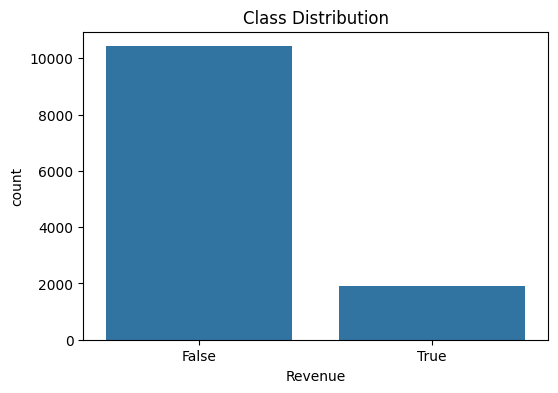

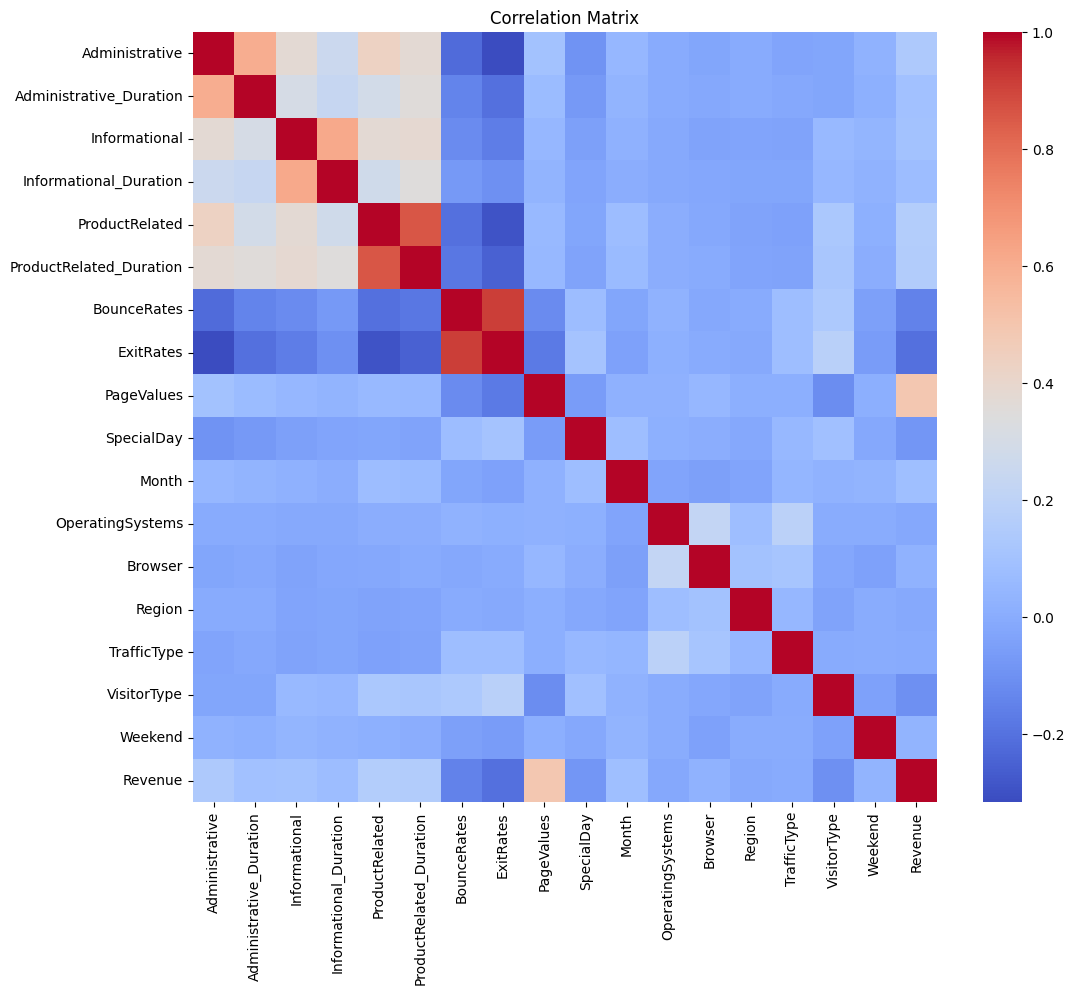

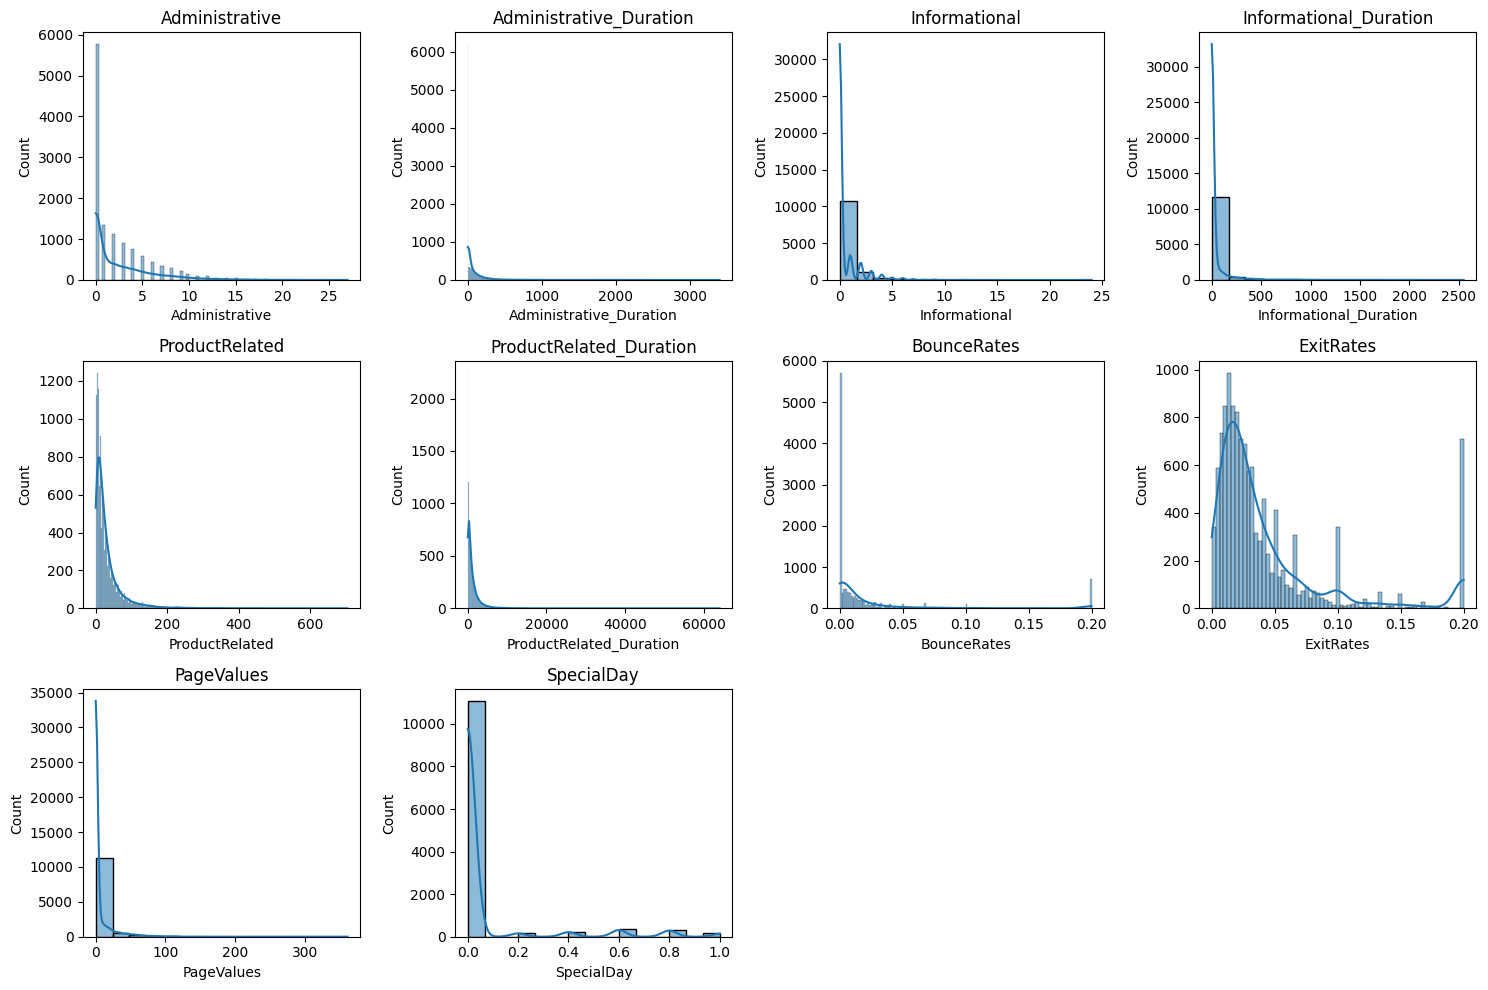

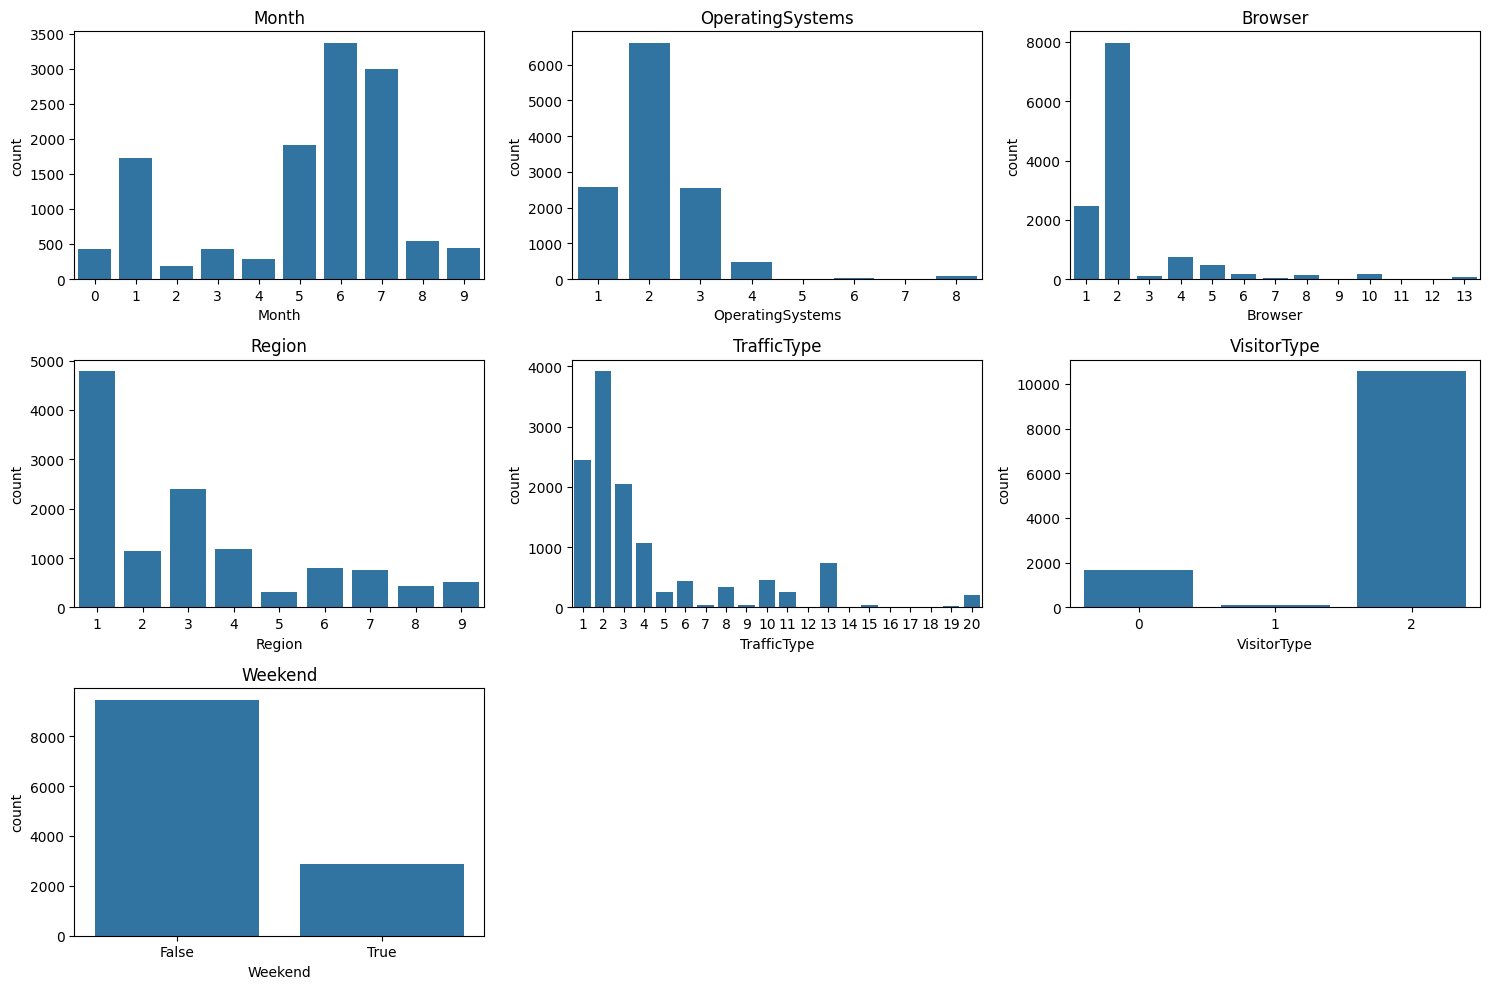


Class distribution after SMOTE:
Revenue
False    7298
True     7298
Name: count, dtype: int64


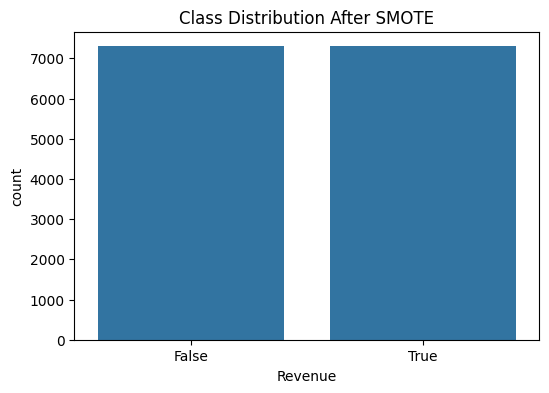


Evaluating Logistic Regression
Accuracy: 0.8705055420383887

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      3124
        True       0.56      0.74      0.64       575

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699

ROC AUC Score: 0.885763513889662


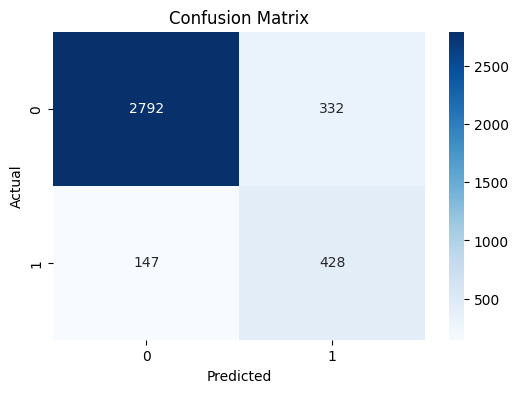


Evaluating SVM
Accuracy: 0.8696945120302785

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      3124
        True       0.56      0.72      0.63       575

    accuracy                           0.87      3699
   macro avg       0.75      0.81      0.78      3699
weighted avg       0.89      0.87      0.88      3699

ROC AUC Score: 0.8784270444803206


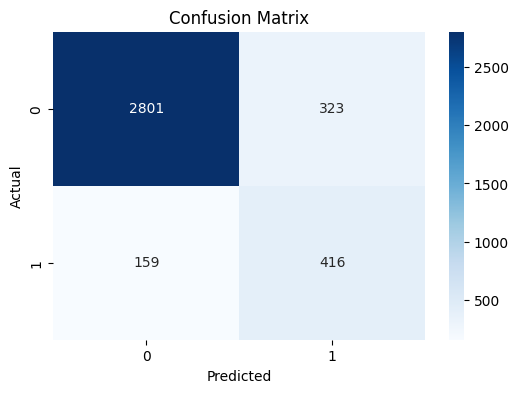


Evaluating Random Forest
Accuracy: 0.891051635577183

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.92      0.93      3124
        True       0.63      0.73      0.68       575

    accuracy                           0.89      3699
   macro avg       0.79      0.82      0.80      3699
weighted avg       0.90      0.89      0.89      3699

ROC AUC Score: 0.9245551967934087


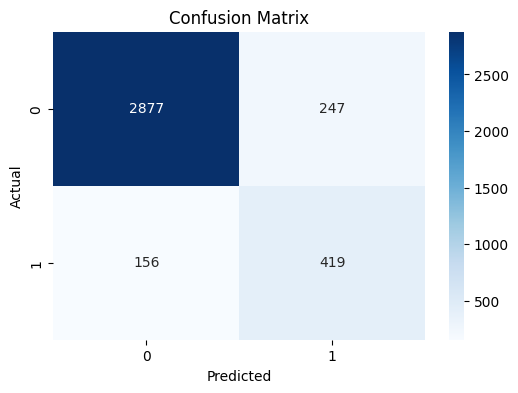


Evaluating KNN
Accuracy: 0.7834549878345499

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.80      0.86      3124
        True       0.39      0.68      0.50       575

    accuracy                           0.78      3699
   macro avg       0.66      0.74      0.68      3699
weighted avg       0.85      0.78      0.81      3699

ROC AUC Score: 0.8144858876579637


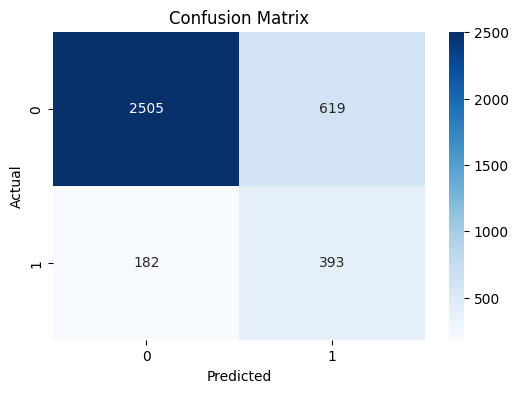


Evaluating XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:34:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8929440389294404

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.94      0.94      3124
        True       0.66      0.64      0.65       575

    accuracy                           0.89      3699
   macro avg       0.80      0.79      0.79      3699
weighted avg       0.89      0.89      0.89      3699

ROC AUC Score: 0.9174547681344987


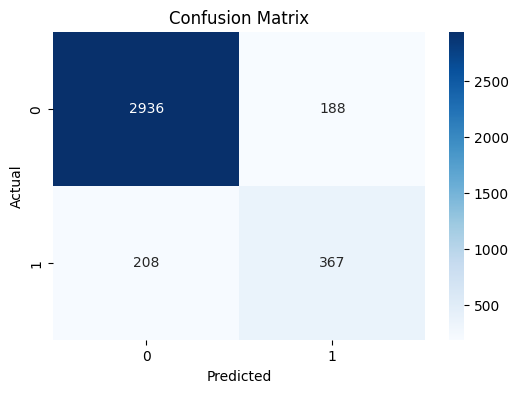


Evaluating Bagging
Accuracy: 0.8864557988645579

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.93      3124
        True       0.63      0.66      0.65       575

    accuracy                           0.89      3699
   macro avg       0.78      0.80      0.79      3699
weighted avg       0.89      0.89      0.89      3699

ROC AUC Score: 0.900032566943161


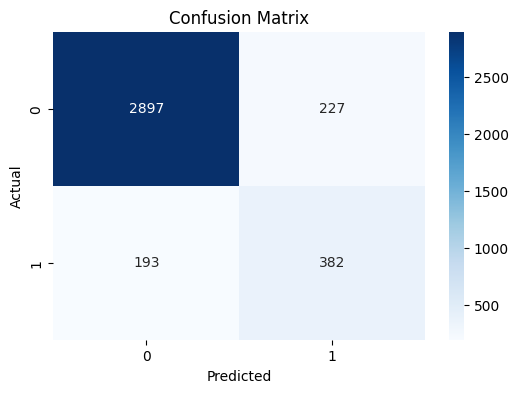


Selected Features:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'VisitorType'],
      dtype='object')

Evaluating Logistic Regression with Feature Selection
Accuracy: 0.8729386320627196

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      3124
        True       0.57      0.74      0.64       575

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699

ROC AUC Score: 0.8914145744029394


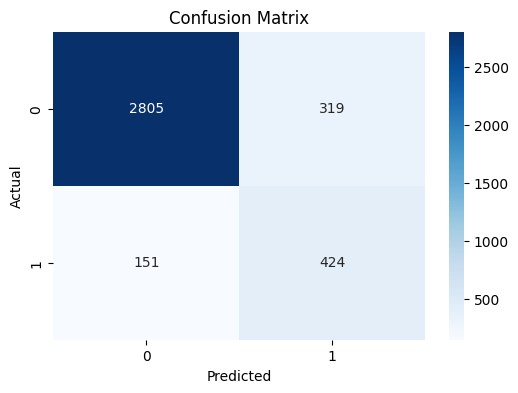


Evaluating SVM with Feature Selection
Accuracy: 0.870235198702352

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      3124
        True       0.56      0.75      0.64       575

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699

ROC AUC Score: 0.886956243389189


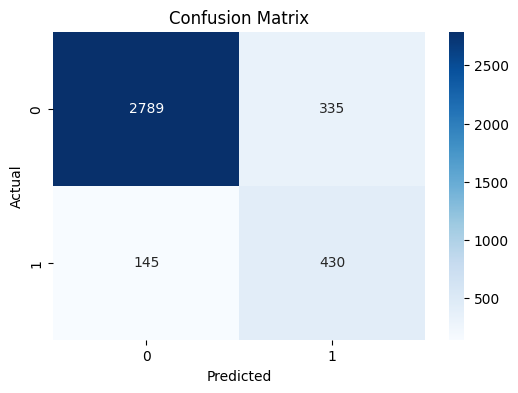


Evaluating Random Forest with Feature Selection
Accuracy: 0.8807785888077859

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.90      0.93      3124
        True       0.59      0.75      0.66       575

    accuracy                           0.88      3699
   macro avg       0.77      0.83      0.79      3699
weighted avg       0.90      0.88      0.89      3699

ROC AUC Score: 0.9028672827478705


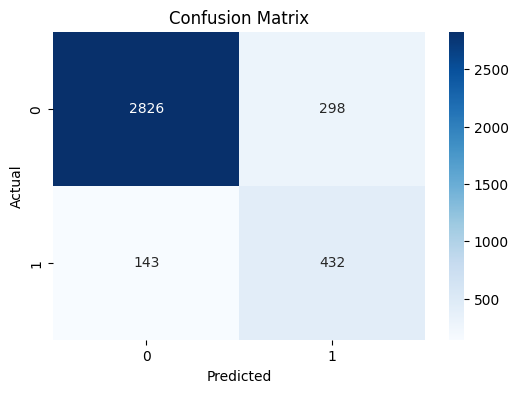


Evaluating KNN with Feature Selection
Accuracy: 0.8010273046769397

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.82      0.87      3124
        True       0.42      0.72      0.53       575

    accuracy                           0.80      3699
   macro avg       0.68      0.77      0.70      3699
weighted avg       0.86      0.80      0.82      3699

ROC AUC Score: 0.8152187830540555


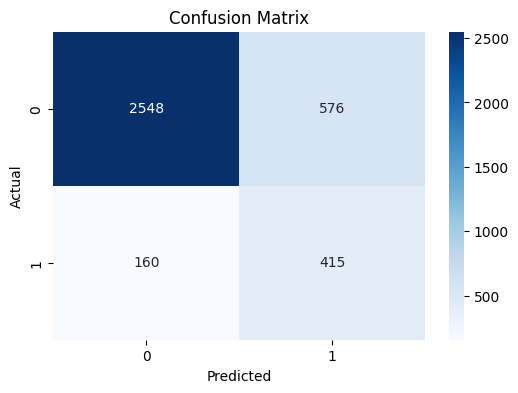


Evaluating XGBoost with Feature Selection


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:34:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8780751554474182

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.92      0.93      3124
        True       0.60      0.67      0.63       575

    accuracy                           0.88      3699
   macro avg       0.77      0.80      0.78      3699
weighted avg       0.89      0.88      0.88      3699

ROC AUC Score: 0.8932831375605411


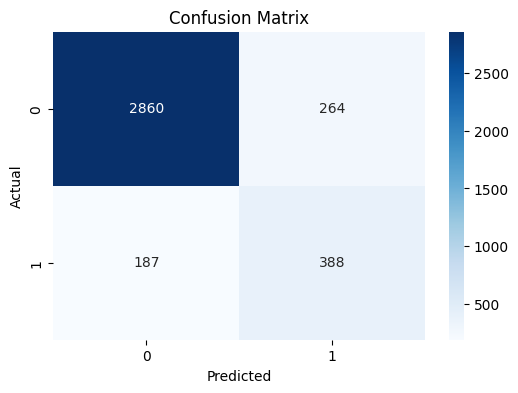


Evaluating Bagging with Feature Selection
Accuracy: 0.8764530954311976

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.91      0.93      3124
        True       0.59      0.67      0.63       575

    accuracy                           0.88      3699
   macro avg       0.76      0.79      0.78      3699
weighted avg       0.88      0.88      0.88      3699

ROC AUC Score: 0.8822281912820799


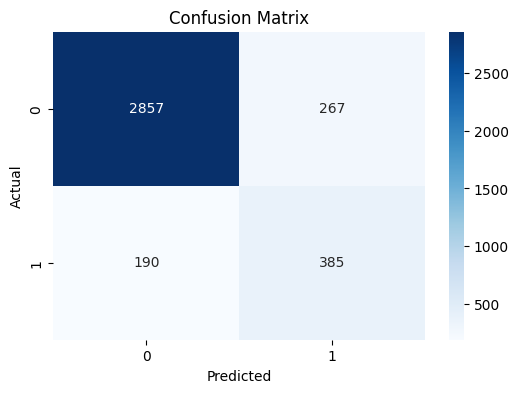


Number of components after PCA: 14

Evaluating Logistic Regression with PCA
Accuracy: 0.8737496620708299

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.90      0.92      3124
        True       0.57      0.74      0.65       575

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699

ROC AUC Score: 0.8878823136447143


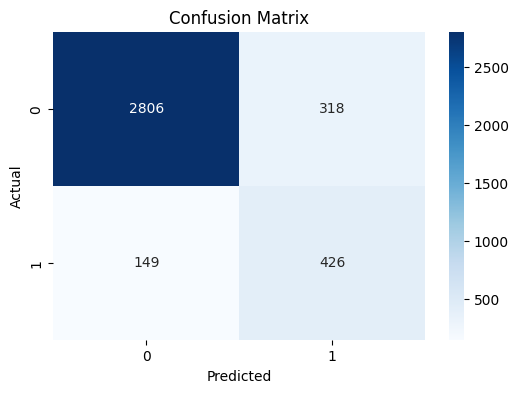


Evaluating SVM with PCA
Accuracy: 0.8664503919978372

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      3124
        True       0.55      0.74      0.63       575

    accuracy                           0.87      3699
   macro avg       0.75      0.81      0.78      3699
weighted avg       0.89      0.87      0.87      3699

ROC AUC Score: 0.8822190057340086


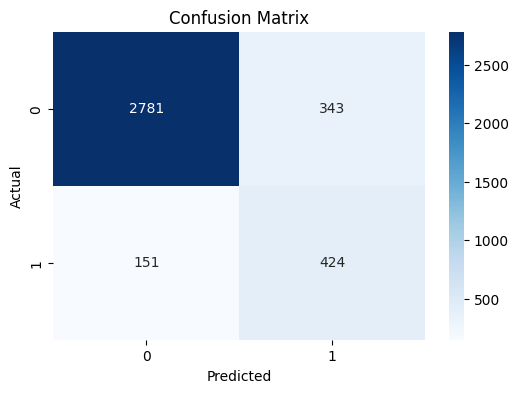


Evaluating Random Forest with PCA
Accuracy: 0.878345498783455

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.93      0.93      3124
        True       0.61      0.59      0.60       575

    accuracy                           0.88      3699
   macro avg       0.77      0.76      0.76      3699
weighted avg       0.88      0.88      0.88      3699

ROC AUC Score: 0.8740672493458775


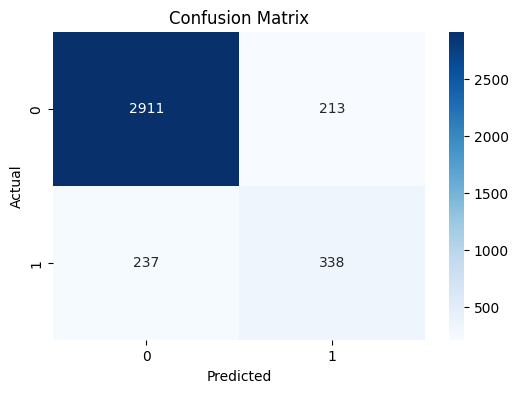


Evaluating KNN with PCA
Accuracy: 0.7850770478507705

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.80      0.86      3124
        True       0.39      0.69      0.50       575

    accuracy                           0.79      3699
   macro avg       0.66      0.74      0.68      3699
weighted avg       0.85      0.79      0.81      3699

ROC AUC Score: 0.8108854311640594


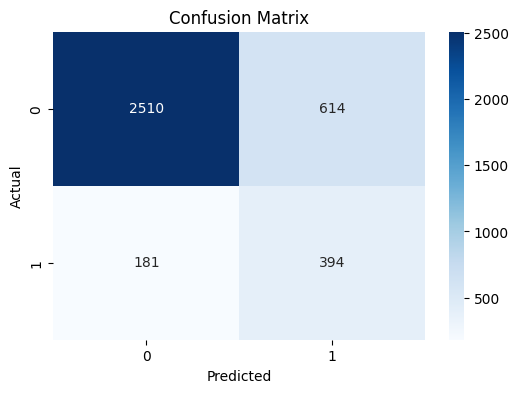


Evaluating XGBoost with PCA


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:35:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8613138686131386

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.90      0.92      3124
        True       0.55      0.63      0.59       575

    accuracy                           0.86      3699
   macro avg       0.74      0.77      0.75      3699
weighted avg       0.87      0.86      0.87      3699

ROC AUC Score: 0.8550108556477203


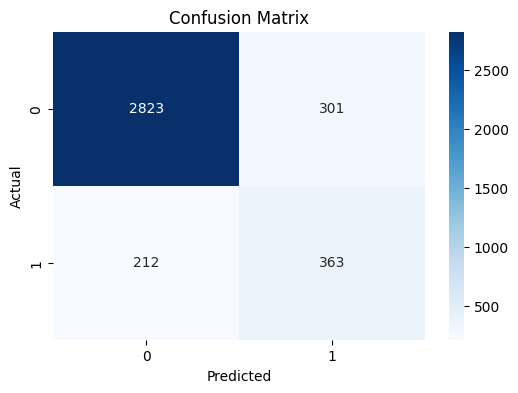


Evaluating Bagging with PCA
Accuracy: 0.8599621519329549

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.91      0.92      3124
        True       0.55      0.57      0.56       575

    accuracy                           0.86      3699
   macro avg       0.73      0.74      0.74      3699
weighted avg       0.86      0.86      0.86      3699

ROC AUC Score: 0.8446242275789122


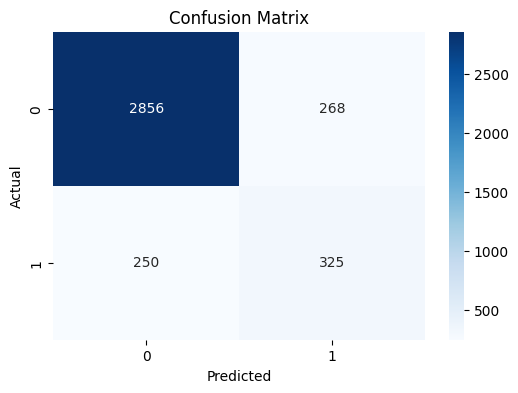

In [ ]:
# --- Install if missing ---
!pip install lime imblearn xgboost

# --- Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import lime
import lime.lime_tabular

# --- Load dataset ---
df = pd.read_csv('/content/online_shoppers_intention.csv')

print("Dataset shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

# --- Data Cleaning & Handling Missing Values ---
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop missing values if needed
# df.dropna(inplace=True)  # Uncomment if necessary

# --- Feature Engineering: Label Encoding Categorical Variables ---
cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
for col in cat_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Separate Features and Target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# --- EDA and Data Visualization ---
# Class Distribution
print("\nClass distribution:")
print(y.value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

# Correlation Matrix
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Numerical Columns
num_cols = ['Administrative', 'Administrative_Duration', 'Informational',
            'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Distribution of Categorical Columns
cat_cols.remove('Revenue')  # already handled
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# --- Data Normalization ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- Handle Imbalanced Dataset with SMOTE ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_smote)
plt.title('Class Distribution After SMOTE')
plt.show()

# --- Model Evaluation Function ---
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    if y_prob is not None:
        print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return model, y_pred

# --- Initialize Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Bagging": BaggingClassifier(random_state=42)
}

# --- Train and Evaluate Models ---
results = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating {name}")
    print(f"{'='*50}")
    trained_model, y_pred = evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test)
    results[name] = {'model': trained_model, 'accuracy': accuracy_score(y_test, y_pred)}

# --- Feature Selection ---
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:")
print(selected_features)

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_new, y, test_size=0.3, random_state=42)
X_train_fs_smote, y_train_fs_smote = smote.fit_resample(X_train_fs, y_train_fs)

# --- Train Models with Feature Selection ---
results_fs = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating {name} with Feature Selection")
    print(f"{'='*50}")
    trained_model, y_pred = evaluate_model(model, X_train_fs_smote, y_train_fs_smote, X_test_fs, y_test_fs)
    results_fs[name] = {'model': trained_model, 'accuracy': accuracy_score(y_test_fs, y_pred)}

# --- PCA for Dimensionality Reduction ---
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print("\nNumber of components after PCA:", pca.n_components_)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train_pca_smote, y_train_pca_smote = smote.fit_resample(X_train_pca, y_train_pca)

# --- Train Models with PCA ---
results_pca = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating {name} with PCA")
    print(f"{'='*50}")
    trained_model, y_pred = evaluate_model(model, X_train_pca_smote, y_train_pca_smote, X_test_pca, y_test_pca)
    results_pca[name] = {'model': trained_model, 'accuracy': accuracy_score(y_test_pca, y_pred)}
